## INTRODUCTION

Data taken from a previous competition of Banco Santander at Kaggle

https://www.kaggle.com/competitions/santander-product-recommendation/overview

In [2]:
#import libraries
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Configure to display maximum columns
pd.set_option("display.max_columns",1000)

In [4]:
#read the training dataset
bank_df = pd.read_csv('train.csv')

In [5]:
#show dataset shape
bank_df.shape

(13647309, 48)

In [6]:
#let's show the header
bank_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
#visualize the columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

## DATA WRANGLING

<AxesSubplot: >

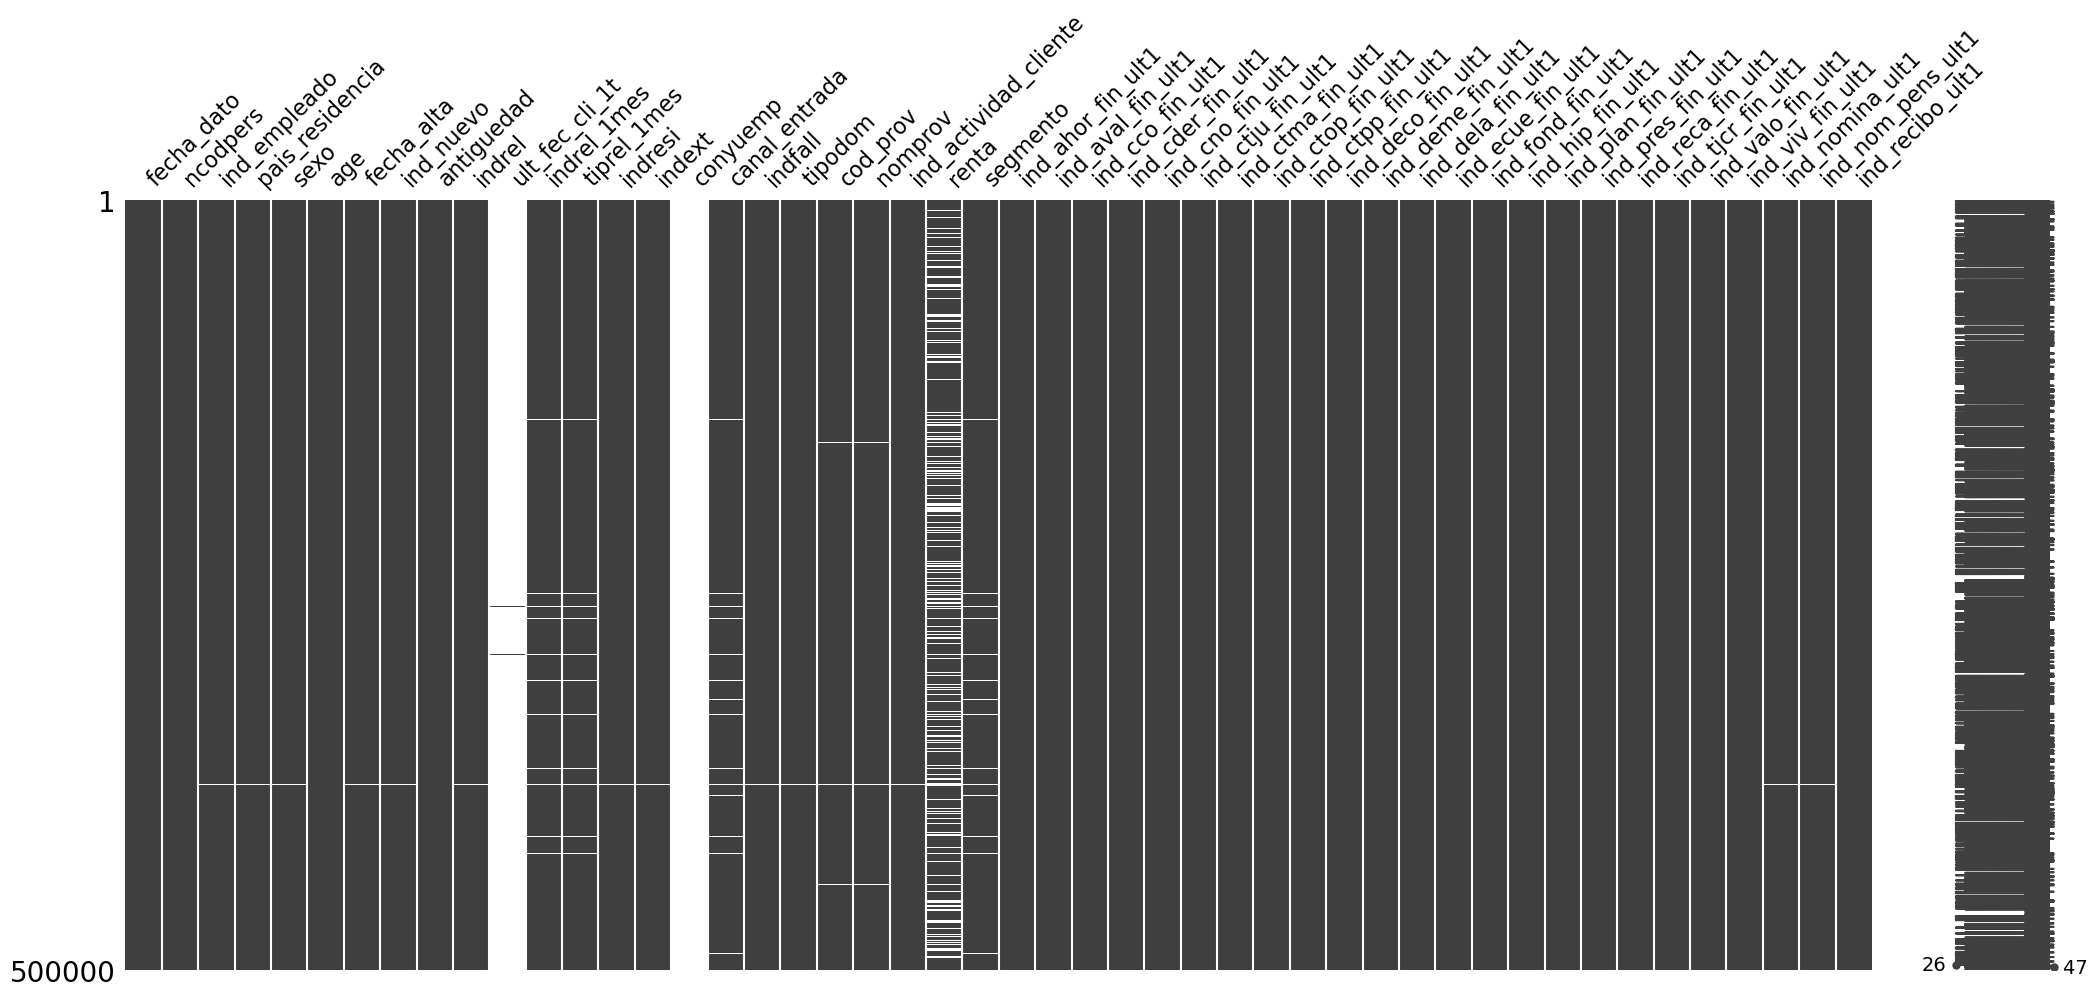

In [8]:
#1. Let's check for missing values with the missingno library
#make a sample 
#Due to the size of the data we will take a sample first
bank_sample = bank_df.sample(500000)
msno.matrix(bank_sample)

In [9]:
#Two columns - seem to be mostly NaN values, so we will remove them
bank_df.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)

In [10]:
#2. The columns after segmento reflect the products
segmento = bank_df.columns.get_loc("segmento")
segmento

21

In [11]:
prod_cols = {
'ind_ahor_fin_ult1':'Saving Account',
'ind_aval_fin_ult1':'Guarantees',
'ind_cco_fin_ult1':'Current Accounts',
'ind_cder_fin_ult1':'Derivada Account',
'ind_cno_fin_ult1':'Payroll Account',
'ind_ctju_fin_ult1':'Junior Account',
'ind_ctma_fin_ult1':'Más particular Account',
'ind_ctop_fin_ult1':'particular Account',
'ind_ctpp_fin_ult1':'particular Plus Account',
'ind_deco_fin_ult1':'Short-term deposits',
'ind_deme_fin_ult1':'Medium-term deposits',
'ind_dela_fin_ult1':'Long-term deposits',
'ind_ecue_fin_ult1':'e-account',
'ind_fond_fin_ult1':'Funds',
'ind_hip_fin_ult1':'Mortgage',
'ind_plan_fin_ult1':'Pensions',
'ind_pres_fin_ult1':'Loans',
'ind_reca_fin_ult1':'Taxes',
'ind_tjcr_fin_ult1':'Credit Card',
'ind_valo_fin_ult1':'Securities',
'ind_viv_fin_ult1':'Home Account',
'ind_nomina_ult1':'Payroll',
'ind_nom_pens_ult1':'Pensions2',
'ind_recibo_ult1':'Direct Debit'
}

In [12]:
#let's now rename the columns
bank_df.rename(columns=prod_cols, inplace=True)

In [13]:
#verify columns
bank_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'Saving Account', 'Guarantees', 'Current Accounts',
       'Derivada Account', 'Payroll Account', 'Junior Account',
       'Más particular Account', 'particular Account',
       'particular Plus Account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities',
       'Home Account', 'Payroll', 'Pensions2', 'Direct Debit'],
      dtype='object')

In [14]:
#3. Drop and reorder columns - keep customer, customer age, product types
selection = [
'ncodpers',
'antiguedad',
'Saving Account',
'Guarantees',
'Current Accounts',
'Derivada Account',
'Payroll Account',
'Junior Account',
'Más particular Account',
'particular Account',
'particular Plus Account',
'Short-term deposits',
'Medium-term deposits',
'Long-term deposits',
'e-account',
'Funds',
'Mortgage',
'Pensions',
'Loans',
'Taxes',
'Credit Card',
'Securities',
'Home Account',
'Payroll',
'Pensions2',
'Direct Debit'   
]

In [15]:
ant_df = bank_df[selection]

In [16]:
#view results
ant_df.head()

,ncodpers,antiguedad,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,1375586,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
#4. Check if there are further null values
ant_df.isnull().sum()

ncodpers                       0
antiguedad                     0
Saving Account                 0
Guarantees                     0
Current Accounts               0
Derivada Account               0
Payroll Account                0
Junior Account                 0
Más particular Account         0
particular Account             0
particular Plus Account        0
Short-term deposits            0
Medium-term deposits           0
Long-term deposits             0
e-account                      0
Funds                          0
Mortgage                       0
Pensions                       0
Loans                          0
Taxes                          0
Credit Card                    0
Securities                     0
Home Account                   0
Payroll                    16063
Pensions2                  16063
Direct Debit                   0
dtype: int64

In [18]:
#4. Review column indeces
#Replace the missing values with 0
ant_df.fillna(0, inplace=True)

In [19]:
ant_df.isnull().sum()

ncodpers                   0
antiguedad                 0
Saving Account             0
Guarantees                 0
Current Accounts           0
Derivada Account           0
Payroll Account            0
Junior Account             0
Más particular Account     0
particular Account         0
particular Plus Account    0
Short-term deposits        0
Medium-term deposits       0
Long-term deposits         0
e-account                  0
Funds                      0
Mortgage                   0
Pensions                   0
Loans                      0
Taxes                      0
Credit Card                0
Securities                 0
Home Account               0
Payroll                    0
Pensions2                  0
Direct Debit               0
dtype: int64

## COLUMN ANTIGUEDAD

Let's explore the customer antiguedad (age) column to see if there are any interesting patterns

In [20]:
#view header
ant_df.head()

,ncodpers,antiguedad,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,1375586,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [21]:
#check the data type
ant_df.antiguedad.dtypes

dtype('O')

In [22]:
ant_df.antiguedad = ant_df.antiguedad.str.replace(' ', '')

In [23]:
#value counts
pd.set_option("display.max_rows", None)
ant_df.antiguedad.value_counts().head(20)

21    118544
12    112571
10    101731
33     95100
45     87590
9      86672
23     81558
36     73252
44     72262
35     71431
34     70963
32     66324
24     62620
46     61600
22     61320
8      57532
20     55861
43     51946
47     48664
48     37346
Name: antiguedad, dtype: int64

In [24]:
#convert to numeric (months)
ant_df = ant_df[pd.to_numeric(ant_df['antiguedad'], errors='coerce').notnull()]

In [25]:
ant_df['antiguedad'] = ant_df['antiguedad'].astype(int)

In [26]:
ant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756970 entries, 0 to 3784703
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ncodpers                 int64  
 1   antiguedad               int64  
 2   Saving Account           int64  
 3   Guarantees               int64  
 4   Current Accounts         int64  
 5   Derivada Account         int64  
 6   Payroll Account          int64  
 7   Junior Account           int64  
 8   Más particular Account   int64  
 9   particular Account       int64  
 10  particular Plus Account  int64  
 11  Short-term deposits      int64  
 12  Medium-term deposits     int64  
 13  Long-term deposits       int64  
 14  e-account                int64  
 15  Funds                    int64  
 16  Mortgage                 int64  
 17  Pensions                 int64  
 18  Loans                    int64  
 19  Taxes                    int64  
 20  Credit Card              int64  
 21  Securiti

In [27]:
#value_counts another time
ant_df.antiguedad.value_counts().head(20)

21    118544
12    112571
10    101731
33     95100
45     87590
9      86672
23     81558
36     73252
44     72262
35     71431
34     70963
32     66324
24     62620
46     61600
22     61320
8      57532
20     55861
43     51946
47     48664
48     37346
Name: antiguedad, dtype: int64

In [28]:
#let's create some groups
bins = [-999999, 0, 40, 80, 120, 160, 200, np.inf]
names = ['<0','0-39','40-79','80-119','120-159','160-199','200+']

ant_df['AgeRange'] = pd.cut(ant_df['antiguedad'], bins, labels=names)

In [29]:
ant_df.head()

,ncodpers,antiguedad,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,AgeRange
0,1375586,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0-39
1,1050611,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0-39
2,1050612,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0-39
3,1050613,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0-39
4,1050614,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0-39


In [30]:
ant_df['AgeRange'].value_counts()

0-39       1485474
40-79       596940
80-119      503990
160-199     496728
120-159     495183
200+        178494
<0             149
Name: AgeRange, dtype: int64

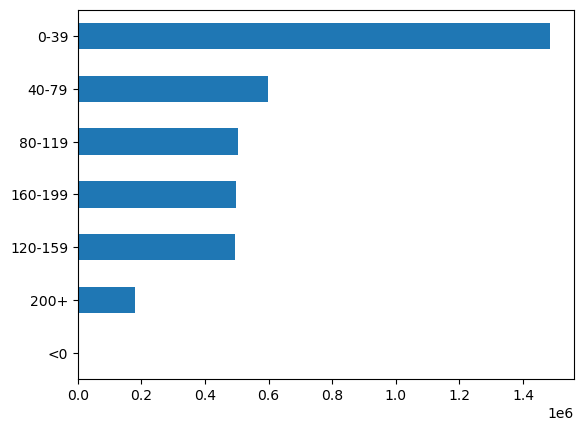

In [31]:
#let's visualize the groups
ant_df['AgeRange'].value_counts().sort_values().plot(kind='barh')
plt.show()

## OLDEST CUSTOMERS

In [32]:
#let's now filter to keep customers with 200 or more months
oldest_df = ant_df[ant_df['AgeRange'] == '200+']

In [33]:
oldest_df.sample(25)

,ncodpers,antiguedad,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,AgeRange
2914326,72718,211,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,1.0,1,200+
1486568,95355,206,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,200+
2102470,98845,205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,1,200+
393551,91879,207,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0,200+
833645,22849,217,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,1.0,1,200+
3557137,103642,203,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,200+
1483653,85917,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0,200+
840053,41457,229,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,200+
427258,45304,226,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,200+
3545745,71473,214,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1.0,1,200+


In [34]:
#group by cust id and count
oldest_df.groupby('ncodpers').size().head(20)

ncodpers
15889    6
15890    6
15892    6
15893    6
15894    6
15895    6
15896    1
15897    6
15899    6
15900    6
15901    6
15902    6
15903    6
15906    6
15907    6
15908    6
15911    6
15913    6
15914    6
15916    6
dtype: int64

In [35]:
#see current shape
oldest_df.shape

(178494, 27)

In [36]:
#set the index with ncodpers
oldest_df.set_index('ncodpers', inplace=True)

In [37]:
#see current shape
oldest_df.shape

(178494, 26)

In [38]:
oldest_df.head()

,antiguedad,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,AgeRange
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,,,
282280,216,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,200+
279716,235,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,200+
281205,232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0,200+
285513,231,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,200+
286927,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0,200+


In [39]:
#merge index
oldest_df = oldest_df.sum(level=0)

In [40]:
#now that we have the oldest, remove antiguedad
oldest_df.drop('antiguedad', axis=1, inplace=True)

In [41]:
oldest_df.sample(10)


,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,
58789,0,0,0,0,6,0,0,0,6,0,0,0,0,6,0,0,0,6,0,0,0,0.0,6.0,6
16217,0,0,0,0,6,0,0,5,0,0,0,6,0,0,0,0,0,0,1,0,0,0.0,3.0,0
83812,0,0,0,0,6,0,0,6,0,0,0,5,6,6,0,0,0,0,0,0,0,0.0,0.0,6
53131,0,0,0,0,6,0,0,0,0,0,0,0,6,0,0,6,0,0,6,6,0,6.0,6.0,6
66968,0,0,6,0,6,0,0,0,0,0,0,0,6,0,0,0,0,6,0,6,0,6.0,6.0,6
92286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
95314,0,0,6,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0.0,0.0,0
35902,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
49673,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## MOST ACCUMULATED PRODUCTS PER MONTH

In [42]:
#make a copy
accumulated_df = oldest_df.copy()

In [43]:
accumulated_df['PROD_AMOUNT'] = accumulated_df.sum(axis=1)

In [44]:
accumulated_df.sample(25)

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,PROD_AMOUNT
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,,
44390,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,6.0
31496,0,0,6,0,0,0,0,0,0,0,0,6,6,0,0,0,0,0,0,0,0,0.0,0.0,6,24.0
101350,0,0,0,0,6,0,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,6.0,6.0,6,32.0
79785,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,6,12.0
48646,0,0,6,0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,12.0
16153,0,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0,0,0.0,0.0,0,18.0
76676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0
95225,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,13.0
51771,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,12.0


In [45]:
#sort by PROD_AMOUNT - TOP 25
top25= accumulated_df['PROD_AMOUNT'].sort_values(ascending=False).head(25)
top25

ncodpers
70962     84.0
21147     81.0
106310    78.0
51897     78.0
21760     77.0
29179     76.0
55566     74.0
106873    74.0
97772     74.0
71208     73.0
72253     72.0
46520     72.0
47517     72.0
26225     72.0
78115     72.0
62116     72.0
60961     72.0
53522     72.0
27367     72.0
86466     72.0
39285     72.0
19938     72.0
93369     72.0
32214     72.0
16507     72.0
Name: PROD_AMOUNT, dtype: float64

In [46]:
#invert order
top25 = top25.sort_values(ascending=True)
top25

ncodpers
47517     72.0
93369     72.0
19938     72.0
39285     72.0
86466     72.0
27367     72.0
53522     72.0
60961     72.0
62116     72.0
78115     72.0
26225     72.0
32214     72.0
16507     72.0
72253     72.0
46520     72.0
71208     73.0
97772     74.0
106873    74.0
55566     74.0
29179     76.0
21760     77.0
51897     78.0
106310    78.0
21147     81.0
70962     84.0
Name: PROD_AMOUNT, dtype: float64

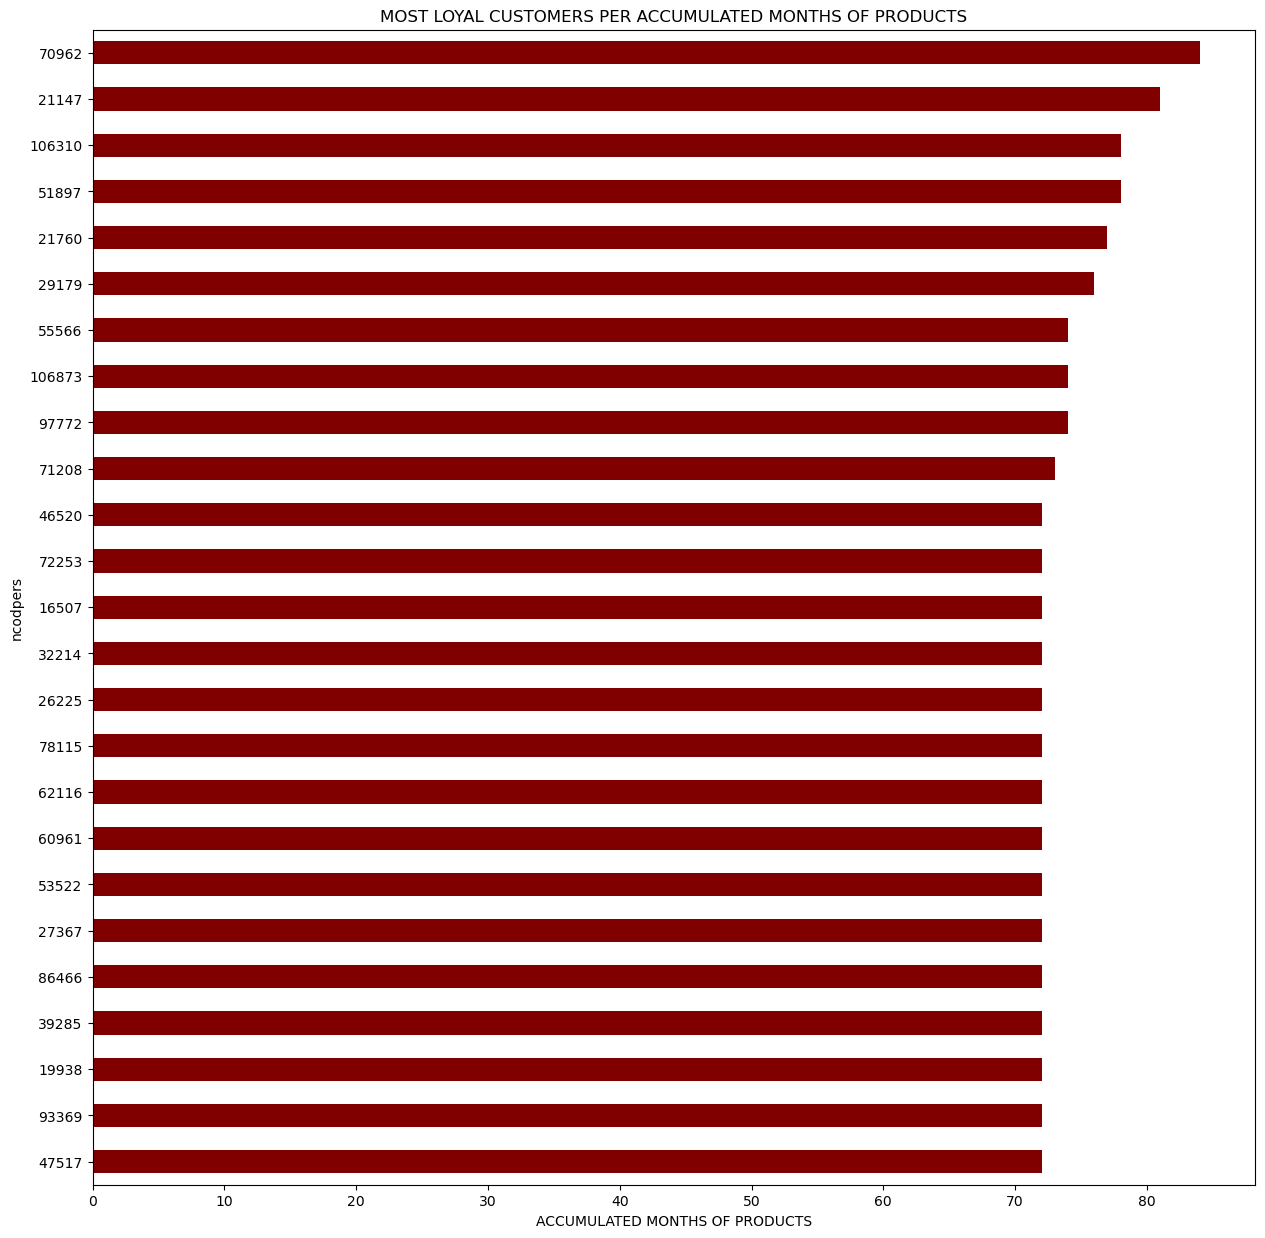

In [47]:
#we could now make a view of most accumulated products per month (most loyal customers)
fig, ax = plt.subplots(figsize=(15, 15))
top25.plot(kind='barh', color='maroon')
plt.title('MOST LOYAL CUSTOMERS PER ACCUMULATED MONTHS OF PRODUCTS')
plt.xlabel('ACCUMULATED MONTHS OF PRODUCTS')
plt.show()

## SPARSITY

In [48]:
oldest_df.sample(5)

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,
31411,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0.0,0.0,0
32408,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
63592,0,0,6,0,0,0,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0,0.0,0.0,0
52316,0,0,5,0,0,0,0,0,6,0,0,0,0,0,0,0,0,6,5,0,0,0.0,0.0,6
99029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [49]:
#determine sparsity - number of cells with 0 values
oldest_df.isin([0]).values.sum()

621945

In [50]:
#total of cells
oldest_df.size

717744

In [51]:
#about 87% sparsity
sparsity = oldest_df.isin([0]).values.sum()/oldest_df.size
sparsity

0.8665276198756102

## MOST USED PRODUCTS

In [52]:
oldest_df.shape

(29906, 24)

In [53]:
#count non zero values per column and sort
used_products = oldest_df.astype(bool).sum(axis=0).sort_values(ascending=False)
used_products

Current Accounts           19764
Direct Debit               11176
particular Account          9001
Payroll Account             7047
Credit Card                 6725
Pensions2                   6110
e-account                   6016
Taxes                       5561
Payroll                     5385
Securities                  4325
particular Plus Account     3654
Long-term deposits          3619
Funds                       3371
Pensions                    2110
Mortgage                     919
Home Account                 616
Loans                        155
Medium-term deposits         135
Short-term deposits           42
Derivada Account              35
Más particular Account        14
Saving Account                14
Guarantees                     5
Junior Account                 0
dtype: int64

In [54]:
up = used_products.to_frame(name='TOTAL')
up

,TOTAL
Current Accounts,19764
Direct Debit,11176
particular Account,9001
Payroll Account,7047
Credit Card,6725
Pensions2,6110
e-account,6016
Taxes,5561
Payroll,5385
Securities,4325


In [55]:
#the top 10
up2 = up[:10].copy()

In [56]:
up2

,TOTAL
Current Accounts,19764
Direct Debit,11176
particular Account,9001
Payroll Account,7047
Credit Card,6725
Pensions2,6110
e-account,6016
Taxes,5561
Payroll,5385
Securities,4325


In [57]:
#others
new_row = pd.DataFrame(data = {
    'TOTAL' : [up['TOTAL'][10:].sum()]
})

In [58]:
new_row.rename(index={0:'OTHER'}, inplace=True)

In [59]:
#combining top 10 with others
up2 = pd.concat([up2, new_row])

In [60]:
up2

,TOTAL
Current Accounts,19764
Direct Debit,11176
particular Account,9001
Payroll Account,7047
Credit Card,6725
Pensions2,6110
e-account,6016
Taxes,5561
Payroll,5385
Securities,4325


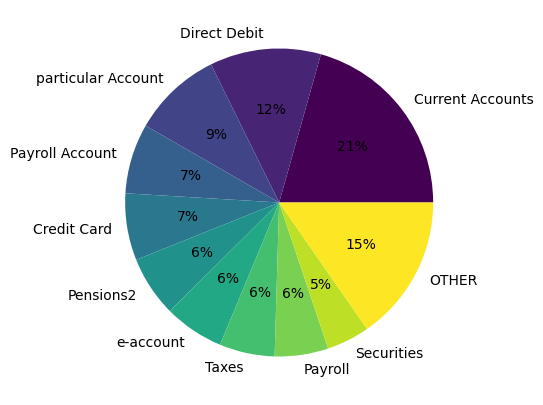

In [61]:
#plot a pie chart
up2.plot(
    kind = 'pie', 
    y='TOTAL',
    ylabel='',
    legend=None, 
    figsize=(5,5), 
    colormap='viridis',
    autopct='%1.0f%%'
)
plt.show()

## SVD with SURPRISE LIBRARY

In [62]:
from surprise import Dataset, SVD, Reader
from surprise.model_selection import cross_validate

In [63]:
# Convert the user_item_matrix to array datatype
uim_arr = np.array(oldest_df)

# Iterate through each row(user)
for row,item in tqdm(enumerate(uim_arr)):
    # Iterate through each column(item)
    for column,item_value in enumerate(item):
        # Change the count of service opted to ratio
        uim_arr[row, column] = uim_arr[row, column] / sum(item)
        
# Convert the array to dataframe for better view
user_item_ratio_matrix = pd.DataFrame(uim_arr, columns=oldest_df.columns, index=oldest_df.index)

29906it [00:01, 15103.58it/s]


In [64]:
# Stack the user_item_ratio_matrix to get all values in single column
user_item_ratio_stacked = user_item_ratio_matrix.stack().to_frame()

# Create column for user id
user_item_ratio_stacked['ncodpers'] = [index[0] for index in user_item_ratio_stacked.index]

# Create column for service_opted
user_item_ratio_stacked['service_opted'] = [index[1] for index in user_item_ratio_stacked.index]

# Reset and drop the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

In [65]:
user_item_ratio_stacked.head()

,0,ncodpers,service_opted
0,0.000000,282280,Saving Account
1,0.000000,282280,Guarantees
2,0.545455,282280,Current Accounts
3,0.000000,282280,Derivada Account
4,0.000000,282280,Payroll Account


In [66]:
# Rename the column 0 to service_selection_ratio
user_item_ratio_stacked.rename(columns={0:"service_selection_ratio"}, inplace=True)

# Arange the column systematicaly for better view
user_item_ratio_stacked = user_item_ratio_stacked[['ncodpers','service_opted', 'service_selection_ratio']]

# Drop all the rows with 0 entries as it means the user has never opted for the service
user_item_ratio_stacked.drop(user_item_ratio_stacked[user_item_ratio_stacked['service_selection_ratio']==0].index, inplace=True)

# Reset the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

In [67]:
user_item_ratio_stacked.head()

,ncodpers,service_opted,service_selection_ratio
0,282280,Current Accounts,0.545455
1,282280,Long-term deposits,0.901639
2,279716,Current Accounts,0.500000
3,279716,particular Account,0.923077
4,281205,Credit Card,1.000000


In [68]:
#create a surprise dataset
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,1), skip_lines=1)

# Load the data
data = Dataset.load_from_df(user_item_ratio_stacked, reader=reader)

# Build trainset object(perform this only when you are using whole dataset to train)
trainset = data.build_full_trainset()

In [69]:
# Initialize model
svd = SVD()

# Cross Validate
svd_results = cross_validate(algo=svd, data=data, cv=4)

# Results!
svd_results

{'test_rmse': array([0.32618342, 0.3297897 , 0.32981268, 0.32465491]),
 'test_mae': array([0.25405374, 0.25654753, 0.25632422, 0.25357884]),
 'fit_time': (0.5482640266418457,
  0.49015092849731445,
  0.587956428527832,
  0.48310136795043945),
 'test_time': (0.11725473403930664,
  0.10126519203186035,
  0.08644914627075195,
  0.08612298965454102)}

In [70]:
#train model
svd = SVD()
# cross-validate
svd.fit(trainset)

In [71]:
pred = svd.predict(282280, 'Current Accounts', verbose=True)

user: 282280     item: Current Accounts r_ui = None   est = 0.63   {'was_impossible': False}


In [72]:
pred = svd.predict(282280, 'Long-term deposits', verbose=True)

user: 282280     item: Long-term deposits r_ui = None   est = 0.47   {'was_impossible': False}
